# Clusters using UMAP

## Table of Contents
* [Import Libraries](#chapter1)

* [Load the Data](#chapter2)
* [2D UMAP Clustering](#2D)
* [3D UMAP Clustering](#3D)
* [Save the Data](#chapter5)


# Import Libraries <a class="anchor" id="chapter1"></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("C:/Users/migue/OneDrive - NOVAIMS/Data Science/Coding Courses/Machine Learning II/Project")
# wd stands for working directory
wd = os.getcwd()

from functions.funcs import *

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import umap
import umap.plot
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from pylab import rcParams

c:\Users\migue\OneDrive - NOVAIMS\Data Science\Coding Courses\Machine Learning II\.venv\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\migue\OneDrive - NOVAIMS\Data Science\Coding Courses\Machine Learning II\.venv\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
 

# Load the Data <a class="anchor" id="chapter2"></a>

In [4]:
dfs = create_dfs(wd + "/UMAP/umap_cluster_data/")

for key in dfs.keys():
    globals()[key] = dfs[key]
    print(f"Created global variable {blue}{key}{end} with values from dictionary dfs key {blue}{key}{end}")

Created dataframe best_customers from best_customers.csv
Created dataframe big_families from big_families.csv
Created dataframe cranky_elders from cranky_elders.csv
Created dataframe fish_markets from fish_markets.csv
Created dataframe gamers from gamers.csv
Created dataframe Info_v2 from Info_v2.csv
Created dataframe party_animals from party_animals.csv
Created dataframe promotion_seekers from promotion_seekers.csv
Created dataframe vegetarians from vegetarians.csv
Created dataframe young_adults from young_adults.csv
Created global variable best_customers with values from dictionary dfs key best_customers
Created global variable big_families with values from dictionary dfs key big_families
Created global variable cranky_elders with values from dictionary dfs key cranky_elders
Created global variable fish_markets with values from dictionary dfs key fish_markets
Created global variable gamers with values from dictionary dfs key gamers
Created global variable Info_v2 with values from dic

In [5]:
print_cols(Info_v2, 'Info_v2')

Columns in Info_v2 are: 
	-customer_id, customer_name, customer_gender, customer_birthdate, kids_home, 
	-teens_home, number_complaints, distinct_stores_visited, lifetime_spend_groceries, lifetime_spend_electronics, 
	-typical_hour, lifetime_spend_vegetables, lifetime_spend_nonalcohol_drinks, lifetime_spend_alcohol_drinks, lifetime_spend_meat, 
	-lifetime_spend_fish, lifetime_spend_hygiene, lifetime_spend_videogames, lifetime_total_distinct_products, percentage_of_products_bought_promotion, 
	-year_first_transaction, loyalty_card_number, latitude, longitude, is_business, 
	-age, years_as_customer, lifetime_spend, spend_per_year, education_level, 
	-2D_DBSCAN_clusters, 3D_DBSCAN_cluster



In [6]:
spend = [col for col in Info_v2.columns if 'spend' in col]

In [7]:
other = ['kids_home', 'teens_home', 'number_complaints', 'age', 'distinct_stores_visited',
        'is_business', 'education_level', 'percentage_of_products_bought_promotion']

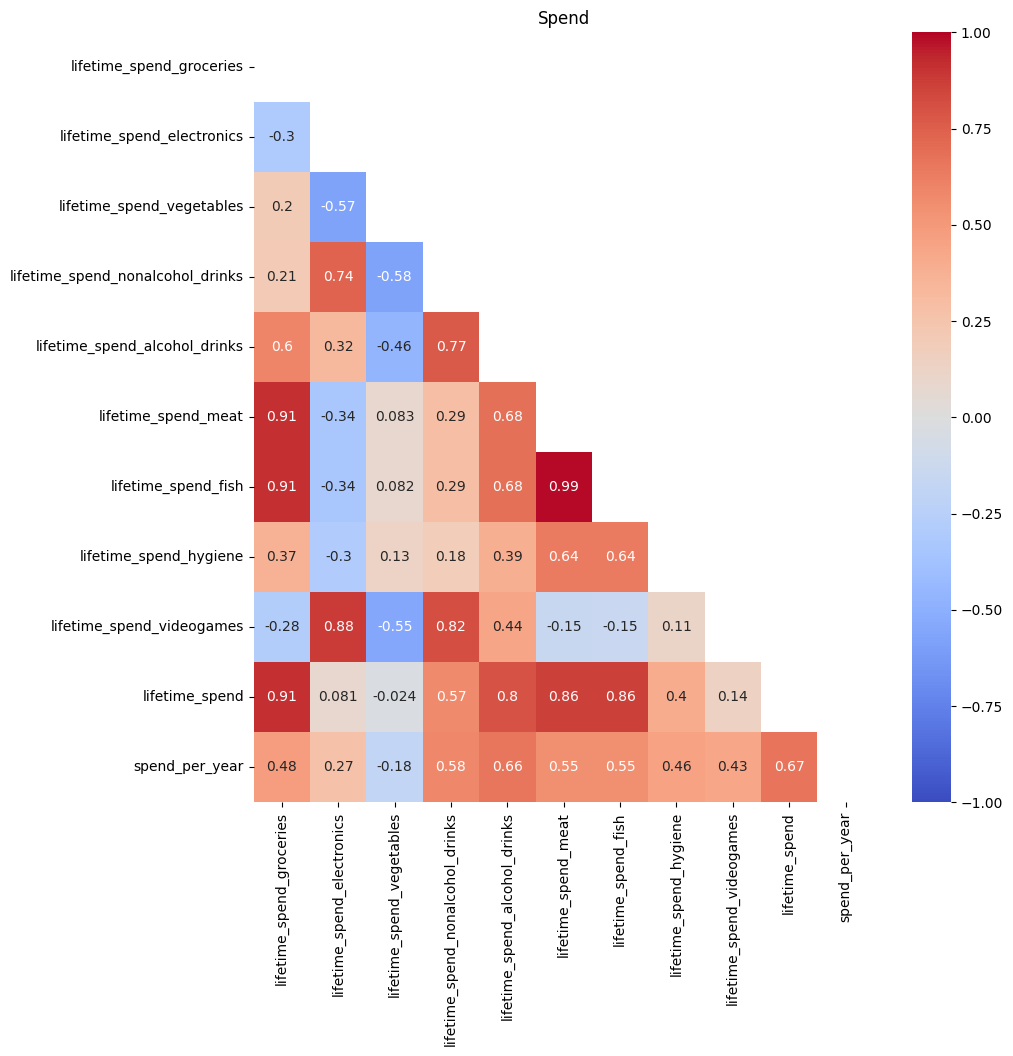

In [8]:
# correlation heatmaps for both spend and other variables
corr_heatmap(Info_v2[spend], 'Spend')
# corr_heatmap(Info_v2[other], 'Other')

In [9]:
# combine "lifetime_spend_meat" and "lifetime_spend_fish" into "lifetime_spend_meat_fish"
Info_v2['lifetime_spend_meat_fish'] = Info_v2['lifetime_spend_meat'] + Info_v2['lifetime_spend_fish']

In [10]:
spend = [col for col in Info_v2.columns if 'spend' in col]

In [11]:
# remove "lifetime_spend_meat", "lifetime_spend_fish", "lifetime_spend" and "lifetime_spend_groceries" from spend
spend = [col for col in spend if col not in ['lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend', 'spend_per_year']] #, 'lifetime_spend_groceries'

In [12]:
len(spend)

8

### Set the seed

In [13]:
seed = 42

In [14]:
len(Info_v2[spend])

28218

In [15]:
# Load data 
data = Info_v2[spend]

In [16]:
import umap
import numpy as np

# Use UMAP to fit the data and transform it to a lower-dimensional space
reducer = umap.UMAP(n_components=2,
                    n_neighbors=30,
                    min_dist=0.1,
                    random_state=seed)

embedding = reducer.fit(data)


c:\Users\migue\OneDrive - NOVAIMS\Data Science\Coding Courses\Machine Learning II\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [17]:
dbscan = DBSCAN(eps=200, min_samples=250)
dbscan.fit(data)
labels = dbscan.labels_

<Axes: >

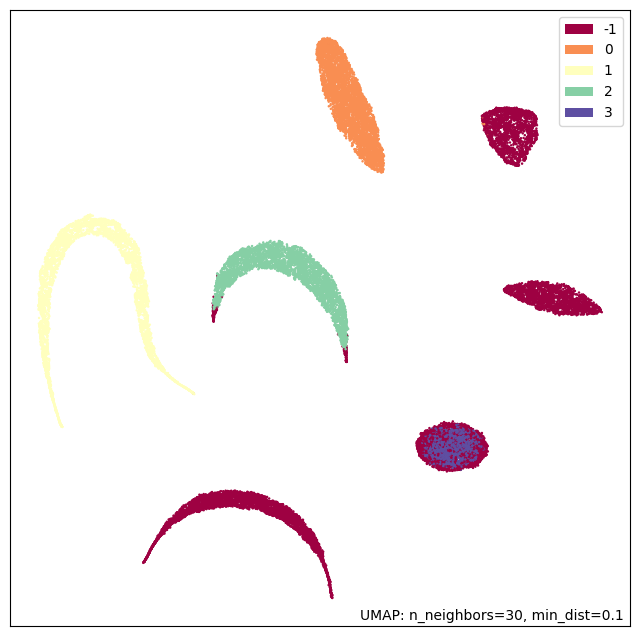

In [18]:
umap.plot.points(reducer, labels=labels)

In [19]:
embedding2d = reducer.fit_transform(data)

c:\Users\migue\OneDrive - NOVAIMS\Data Science\Coding Courses\Machine Learning II\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [20]:
group_by_cluster(Info_v2[spend+other+['lifetime_spend_groceries']], labels)

,-1,0,1,2,3,Overall Mean
lifetime_spend_groceries,8448.94,302.91,997.7,200.43,5004.8,4223.3
lifetime_spend_electronics,530.87,20.04,50.04,4996.2,200.19,1025.2
lifetime_spend_vegetables,573.93,300.24,1499.74,20.03,604.68,597.8
lifetime_spend_nonalcohol_drinks,704.66,300.45,20.0,1500.9,898.31,658.5
lifetime_spend_alcohol_drinks,483.81,199.85,20.12,499.62,497.49,360.2
lifetime_spend_hygiene,227.61,50.03,100.03,50.04,504.7,170.4
lifetime_spend_videogames,393.2,5.23,49.93,2002.08,999.11,566.3
lifetime_spend_meat_fish,1983.22,300.59,0.0,116.69,2203.08,1086.7
kids_home,1.16,1.0,1.16,0.69,3.07,1.2
teens_home,0.57,0.07,0.77,0.07,1.83,0.5


In [21]:
dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(embedding2d)

<Axes: >

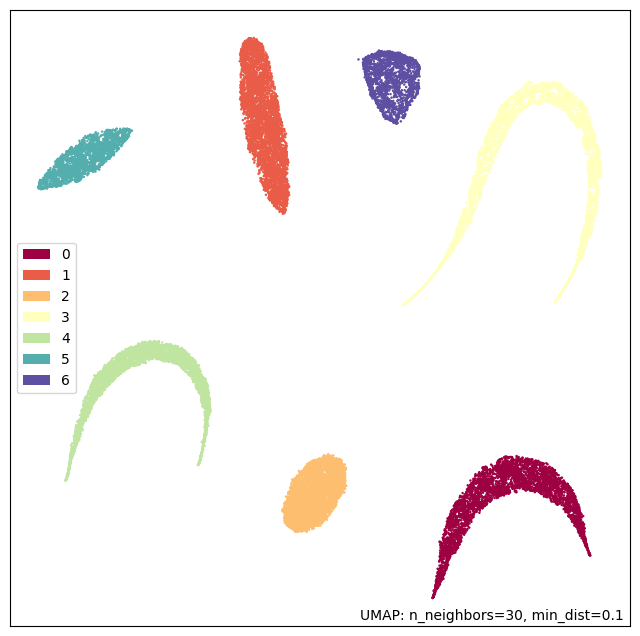

In [22]:
umap.plot.points(reducer, labels=labels)

In [23]:
spend

['lifetime_spend_groceries',
 'lifetime_spend_electronics',
 'lifetime_spend_vegetables',
 'lifetime_spend_nonalcohol_drinks',
 'lifetime_spend_alcohol_drinks',
 'lifetime_spend_hygiene',
 'lifetime_spend_videogames',
 'lifetime_spend_meat_fish']

In [24]:
group_by_cluster(Info_v2[spend+other], labels)

,0,1,2,3,4,5,6,Overall Mean
lifetime_spend_groceries,200.41,302.96,4997.02,997.55,14993.31,6998.61,617.42,4223.3
lifetime_spend_electronics,4999.56,20.0,200.01,50.04,199.97,1002.71,611.01,1025.2
lifetime_spend_vegetables,20.03,300.23,602.1,1499.74,799.56,402.55,302.61,597.8
lifetime_spend_nonalcohol_drinks,1500.95,300.43,900.79,20.01,900.79,400.47,302.5,658.5
lifetime_spend_alcohol_drinks,499.87,199.78,500.9,20.12,599.15,402.98,298.15,360.2
lifetime_spend_hygiene,49.91,50.03,500.75,100.03,199.99,200.34,50.16,170.4
lifetime_spend_videogames,2002.2,5.0,997.7,49.93,50.01,502.89,199.99,566.3
lifetime_spend_meat_fish,116.69,300.57,2202.16,0.0,2999.8,1398.83,398.62,1086.7
kids_home,0.69,1.0,3.08,1.16,1.0,0.16,0.51,1.2
teens_home,0.07,0.07,1.81,0.77,0.27,0.0,0.52,0.5


In [25]:
# use k-means to cluster the data
kmeans = KMeans(n_clusters=7, random_state=seed)
kmeans.fit(data)
labels = kmeans.labels_

c:\Users\migue\OneDrive - NOVAIMS\Data Science\Coding Courses\Machine Learning II\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

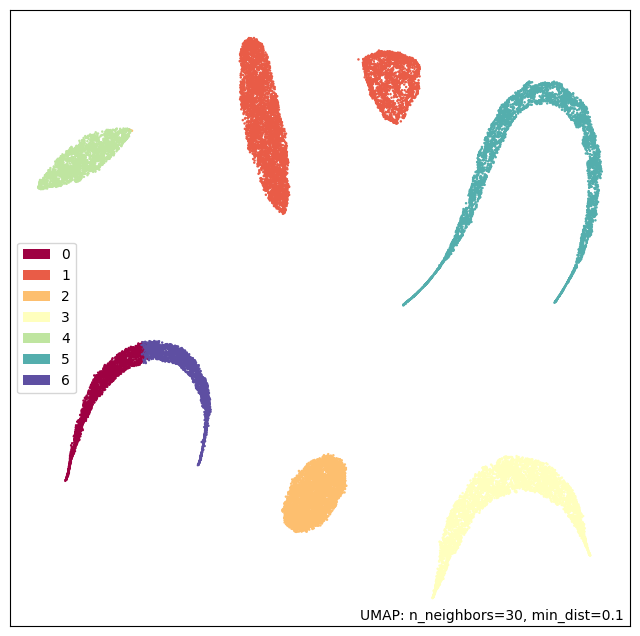

In [26]:
umap.plot.points(reducer, labels=labels)

In [27]:
group_by_cluster(Info_v2[spend+other], labels)

,0,1,2,3,4,5,6,Overall Mean
lifetime_spend_groceries,14198.62,401.78,4997.38,200.41,7002.28,997.74,15826.26,4223.3
lifetime_spend_electronics,200.01,206.14,200.83,4999.56,1002.79,50.03,199.93,1025.2
lifetime_spend_vegetables,801.51,300.96,601.86,20.03,402.6,1499.51,797.51,597.8
lifetime_spend_nonalcohol_drinks,899.71,301.08,900.24,1500.95,400.49,20.07,901.91,658.5
lifetime_spend_alcohol_drinks,599.54,230.75,500.82,499.87,402.93,20.17,598.73,360.2
lifetime_spend_hygiene,201.78,50.07,500.42,49.91,200.36,100.02,198.1,170.4
lifetime_spend_videogames,50.09,66.39,997.18,2002.2,502.89,49.96,49.93,566.3
lifetime_spend_meat_fish,3000.46,331.46,2201.33,116.69,1398.75,0.06,2999.1,1086.7
kids_home,0.99,0.85,3.08,0.69,0.16,1.16,1.0,1.2
teens_home,0.27,0.21,1.81,0.07,0.0,0.77,0.27,0.5
